In [2]:
# 数据预处理
# 一、paddle.vision.transforms 介绍

# 二、在数据集中应用数据预处理操作
## 2.1 在框架内置数据集中应用

## 2.2 在自定义的数据集中应用
# 下载 MNIST 数据集并解压
# ! wget https://paddle-imagenet-models-name.bj.bcebos.com/data/mnist.tar
# ! tar -xf mnist.tar

import os
import cv2
import numpy as np
from paddle.io import Dataset
from paddle.vision.transforms import Compose, RandomRotation, Resize

class MyDataset(Dataset):
    """
    步骤一：继承 paddle.io.Dataset 类
    """
    def __init__(self, data_dir, label_path, transform=None):
        """
        步骤二：实现 __init__ 函数，初始化数据集，将样本和标签映射到列表中
        """
        super(MyDataset, self).__init__()
        self.data_list = []
        with open(label_path,encoding='utf-8') as f:
            for line in f.readlines():
                image_path, label = line.strip().split('\t')
                image_path = os.path.join(data_dir, image_path)
                self.data_list.append([image_path, label])
        # 2. 传入定义好的数据处理方法，作为自定义数据集类的一个属性
        self.transform = transform

    def __getitem__(self, index):
        """
        步骤三：实现 __getitem__ 函数，定义指定 index 时如何获取数据，并返回单条数据（样本数据、对应的标签）
        """
        image_path, label = self.data_list[index]
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = image.astype('float32')
        # 3. 应用数据处理方法到图像上
        if self.transform is not None:
            image = self.transform(image)
        label = int(label)
        return image, label

    def __len__(self):
        """
        步骤四：实现 __len__ 函数，返回数据集的样本总数
        """
        return len(self.data_list)
# 1. 定义随机旋转和改变图片大小的数据处理方法
transform = Compose([RandomRotation(10), Resize(size=32)])

custom_dataset = MyDataset('mnist/train','mnist/train/label.txt', transform)


--2023-01-04 08:24:34--  https://paddle-imagenet-models-name.bj.bcebos.com/data/demo_images/flower_demo.png
Resolving paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)... 10.70.0.165
Connecting to paddle-imagenet-models-name.bj.bcebos.com (paddle-imagenet-models-name.bj.bcebos.com)|10.70.0.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68587 (67K) [image/png]
Saving to: ‘flower_demo.png.2’

flower_demo.png.2   100%[===================>]  66.98K  --.-KB/s    in 0.008s  

2023-01-04 08:24:34 (8.26 MB/s) - ‘flower_demo.png.2’ saved [68587/68587]



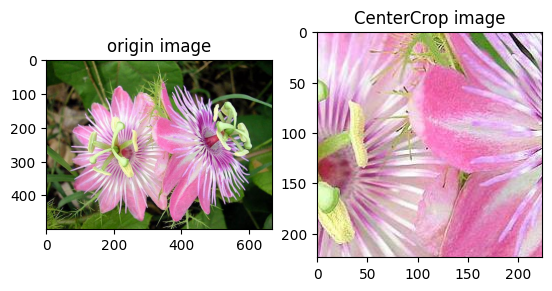

In [5]:
# 三、数据预处理的几种方法介绍
# 下载示例图片
! wget https://paddle-imagenet-models-name.bj.bcebos.com/data/demo_images/flower_demo.png

import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from paddle.vision.transforms import CenterCrop

transform = CenterCrop(224)

image = cv2.imread('flower_demo.png')

image_after_transform = transform(image)
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(image[:,:,::-1])
plt.subplot(1,2,2)
plt.title('CenterCrop image')
plt.imshow(image_after_transform[:,:,::-1])

# 略
